Çoğu Makine Öğrenimi algoritması, kategorik verilerle çalışamaz ve sayısal verilere dönüştürülmesi gerekir. Bazen veri kümelerinde kategorik özellikler (dize değerleri) içeren sütunlarla karşılaşırız, 

**örneğin** Cinsiyet parametresi Erkek , Kız  gibi kategorik parametrelere sahip olacaktır . Bu etiketlerin belirli bir tercih sırası yoktur ve ayrıca veriler dize etiketleri olduğundan, makine öğrenimi modelleri, içlerinde bir tür hiyerarşi olduğunu yanlış yorumlamıştır.

Bu sorunu çözmek için bir yaklaşım, bu etiketlere sayısal bir değer atayacağımız etiket kodlaması olabilir, örneğin 0 ve 1 ile eşlenen Erkek ve Kadın . Ancak bu, 1>0 olarak Erkek parametresine daha fazla tercih vermeye başlayacağından ve ideal olarak veri setinde her iki etiket de eşit derecede önemli olduğundan, modelimize önyargı ekleyebilir . Bu sorunu çözmek için ***One Hot Encoding*** tekniğini kullanacağız.

#One Hot Encoding
Bu teknikte, kategorik parametreler hem Erkek hem de Kadın etiketleri için ayrı sütunlar hazırlayacaktır. Yani, nerede Erkek varsa, değer Erkek sütununda 1, Kadın sütununda 0 olacaktır ve bunun tersi de geçerlidir. 

Bir örnekle anlayalım: Meyvelerin ve bunlara karşılık gelen kategorik değerlerin ve fiyatların verildiği verileri düşünün.

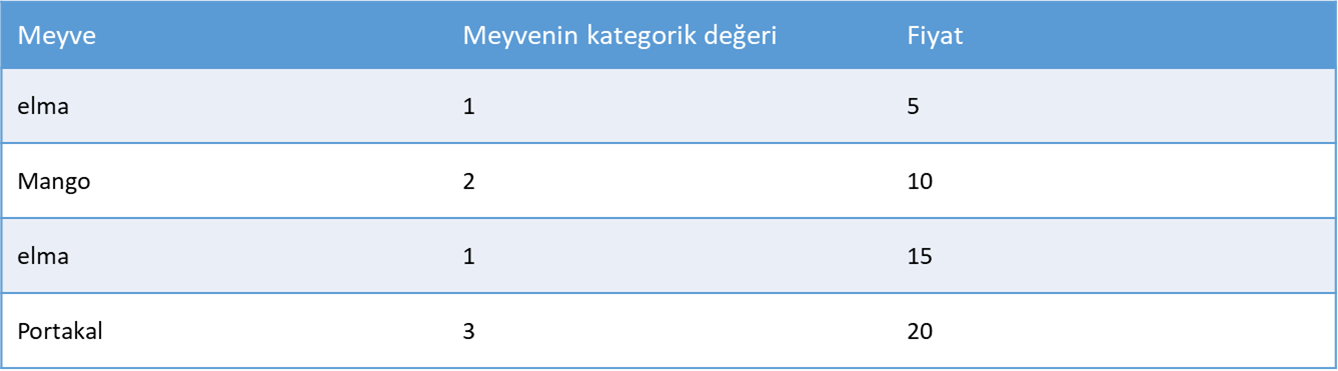

**Verilerin One Hot Encoding den çıktısı :**

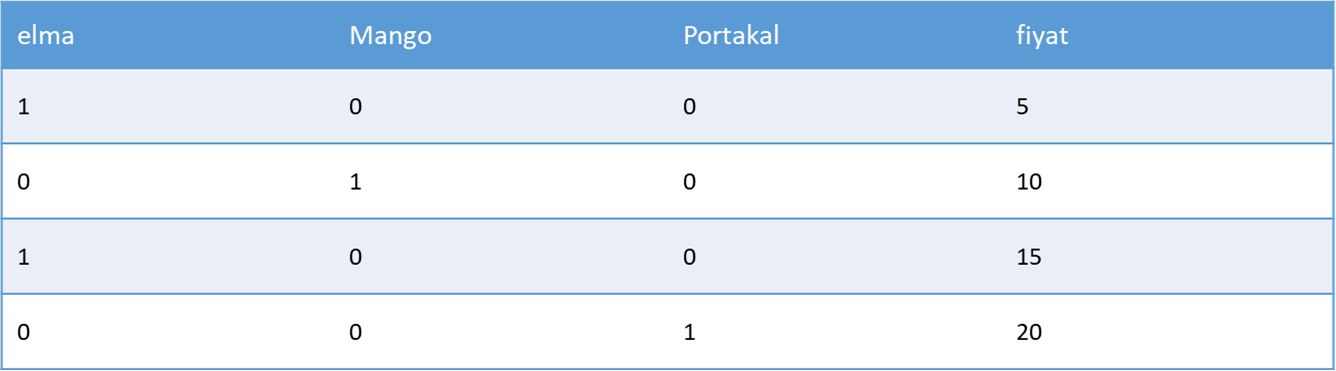

**Örnek :Manuel One-Hot Encoding**

In [9]:
import numpy as np
import pandas as pd 

data = pd.read_csv('/content/one-hot.csv')

Kategorik parametrelerdeki etiketlerin kontrol edilmesi 

In [12]:
print(data['Cinsiyet'].unique())
print(data['Durum'].unique())

['Erkek' 'Kız']
['Harika' 'Güzel' 'İyi']


Kategorik parametrelerde etiket sayılarının kontrol edilmesi 

In [14]:
data['Cinsiyet'].value_counts()
data['Durum'].value_counts()

Harika    2
İyi       2
Güzel     1
Name: Durum, dtype: int64

Kategorik parametreleri get_dummies() kullanarak One-Hot kodlaması 

In [15]:
one_hot_kodlama = pd.get_dummies(data,columns= ['Durum', 'Cinsiyet'])
print(one_hot_kodlama)

     İsim  Çalışan_ID  Durum_Güzel  Durum_Harika  Durum_İyi  Cinsiyet_Erkek  \
0   Tarık          78            0             1          0               1   
1   Defne          58            1             0          0               0   
2    İrem          49            0             0          1               0   
3   Yusuf          62            0             1          0               1   
4  Levent          61            0             0          1               1   

   Cinsiyet_Kız  
0             0  
1             1  
2             1  
3             0  
4             0  


Verilerde 3 Açıklama ve 2 Cinsiyet sütunumuz olduğunu görebiliyoruz . Ancak, n benzersiz etiketi varsa, parametreleri tanımlamak için yalnızca n-1 sütun kullanabilirsiniz. Örneğin sadece Cinsiyete_Kız sütununu tutup Cinsiyet_Erkek sütununu bırakırsak , etiket 1 olduğunda Kız, etiket 0 olduğunda erkek anlamına geldiği gibi tüm bilgileri de aktarabiliriz. Bu şekilde kategorik verileri kodlayabilir ve parametre sayısını da azaltabiliriz.